In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
# In order to understand each line of code in this notebook 
# review LR-Cassava notebook. 

In [3]:
countires = [ 
    "Angola",
    "Benin",
    "Botswana",
    "Burkina Faso",
    "Burundi",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Congo",
    "Democratic Republic of the",
    "Côte d'Ivoire",
    "Eritrea",
    "Ethiopia",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Kenya",
    "Libya",
    "Malawi",
    "Mali",
    "Mauritania",
    "Morocco",
    "Mozambique",
    "Namibia",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Senegal",
    "Sierra Leone",
    "South Africa",
    "South Sudan",
    "Sudan",
    "Sudan (former)",
    "Togo",
    "Uganda",
    "Zambia",
    "Zimbabwe"   
]


In [4]:
Yields = pd.read_csv('/home/dgorrell/Downloads/Millet-10-17-2019.csv') #Change name of the dataset to casava. We will beable to compare for different datasets
Temp = pd.read_csv('/home/dgorrell/Downloads/GlobalTemperatures.csv')
Preception = pd.read_csv('/home/dgorrell/Downloads/precipitation_perCountry_perYear.csv')

In [5]:
Temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [6]:
Yields

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,2,Afghanistan,5419,Yield,79,Millet,1961,1961,hg/ha,8085,Fc,Calculated data
1,QC,Crops,2,Afghanistan,5419,Yield,79,Millet,1962,1962,hg/ha,8163,Fc,Calculated data
2,QC,Crops,2,Afghanistan,5419,Yield,79,Millet,1963,1963,hg/ha,8235,Fc,Calculated data
3,QC,Crops,2,Afghanistan,5419,Yield,79,Millet,1964,1964,hg/ha,8302,Fc,Calculated data
4,QC,Crops,2,Afghanistan,5419,Yield,79,Millet,1965,1965,hg/ha,8364,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,QC,Crops,181,Zimbabwe,5419,Yield,79,Millet,2013,2013,hg/ha,1857,Fc,Calculated data
4233,QC,Crops,181,Zimbabwe,5419,Yield,79,Millet,2014,2014,hg/ha,3167,Fc,Calculated data
4234,QC,Crops,181,Zimbabwe,5419,Yield,79,Millet,2015,2015,hg/ha,1244,Fc,Calculated data
4235,QC,Crops,181,Zimbabwe,5419,Yield,79,Millet,2016,2016,hg/ha,1655,Fc,Calculated data


In [7]:
Yields["Area"].unique()

array(['Afghanistan', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin', 'Bhutan',
       'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'China', 'China, mainland',
       'China, Taiwan Province of', 'Congo', "Côte d'Ivoire", 'Croatia',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Eritrea', 'Ethiopia',
       'Ethiopia PDR', 'France', 'Gambia', 'Ghana', 'Greece', 'Guinea',
       'Guinea-Bissau', 'Hungary', 'India', 'Iran (Islamic Republic of)',
       'Iraq', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       'Libya', 'Malawi', 'Maldives', 'Mali', 'Mauritania', 'Mexico',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger',
       'Nigeria', 'Pakistan', 'Poland', 'Portugal', 'Republic of Korea',
       'Republic of Moldova', 'Russian Federation', 'Rwanda',
       '

In [8]:
years = np.unique(Temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(Temp[Temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(Temp[Temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

In [9]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature
global_temp_country = pd.read_csv('/home/dgorrell/Downloads/GlobalLandTemperaturesByCountry.csv')
global_temp_country["Country"].unique()
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]
#global_temp_country_clear["Country"].unique()
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)', 'Cape Verde'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom', 'Cabo Verde'])
#global_temp_country_clear["Country"].unique()

In [10]:
mean_temp_year_country = [ [0] * len(years[0:]) for i in range(len(countires))]
j = 0
for country in countires:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[0:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1
    
#mean_temp_year_country

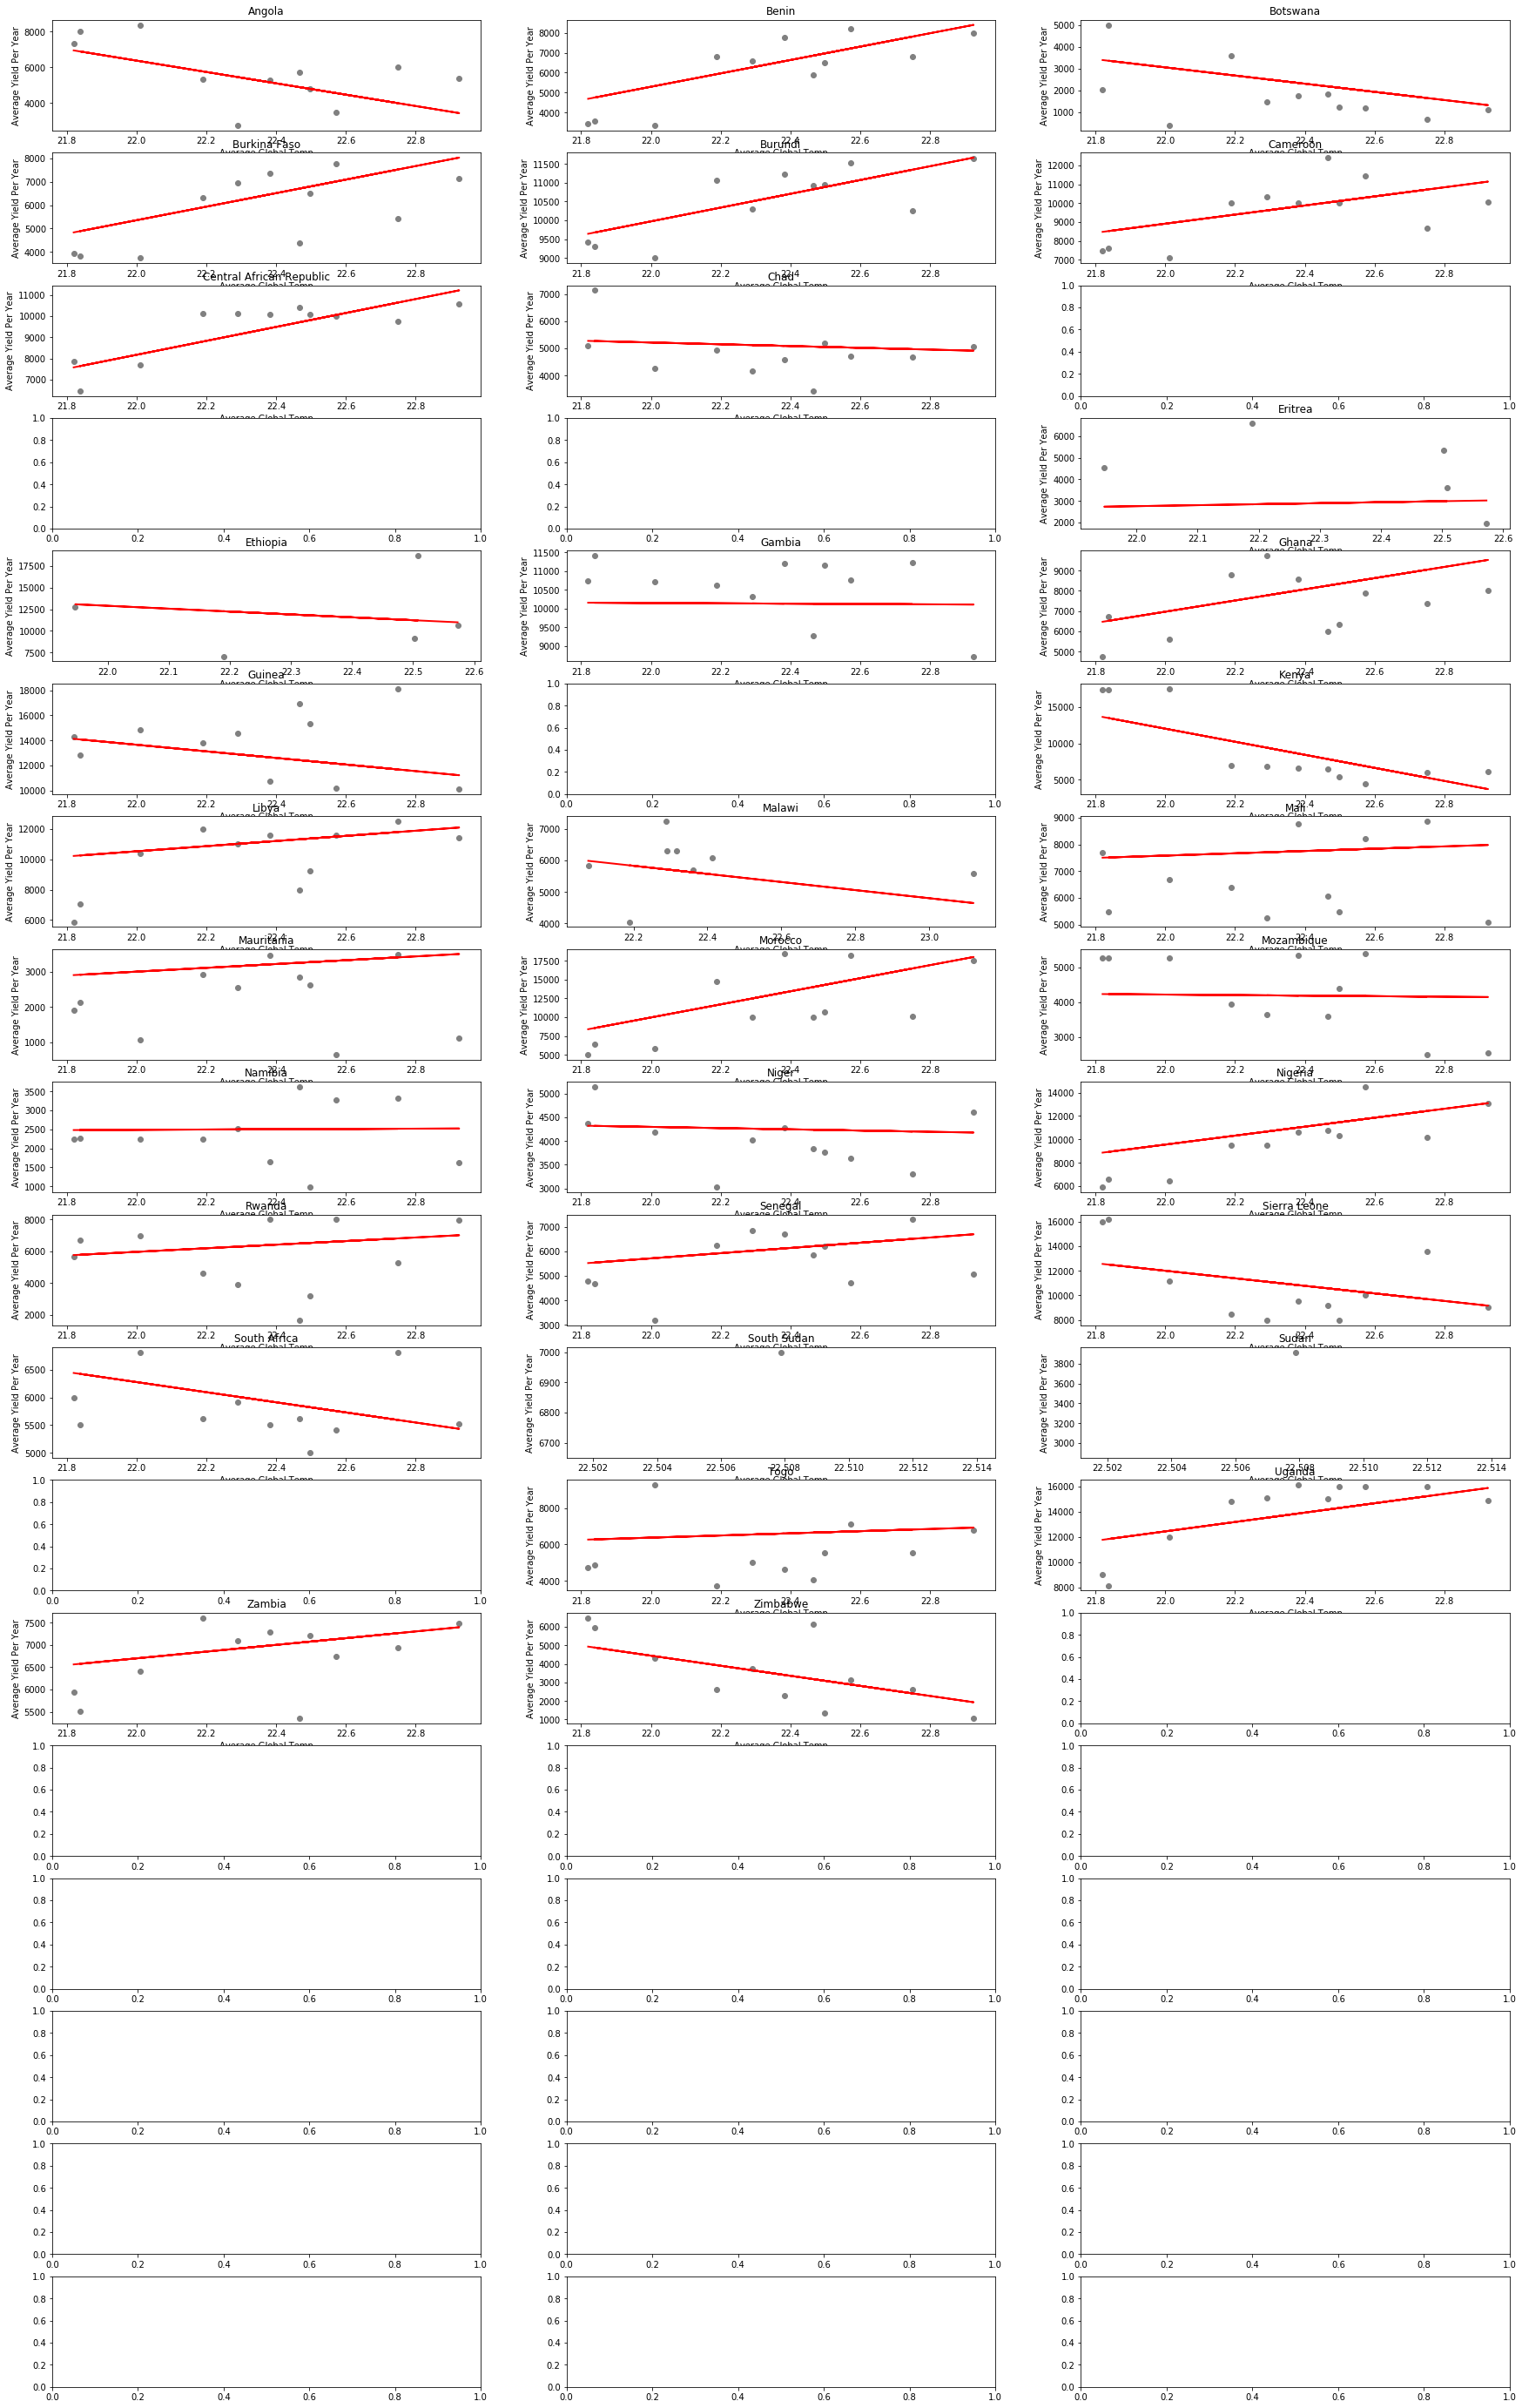

In [11]:
fig, axmatrix = plt.subplots(18,3, figsize = (30, 50))
ax = axmatrix.flatten()
for iplot, COUNTRY in enumerate (countires):
    # Creating masks for yields country
    maskCountry = Yields["Area"] == COUNTRY 
    yearsInCountry = Yields["Year"][maskCountry]
    yieldsInCountry = Yields["Value"][maskCountry]
    
    # Creating masks for precepitation
    maskPreception = Preception["country"] == COUNTRY
    yearsInPreception = np.array(Preception["year"][maskPreception]).astype("int")
    preceptionInCountry = Preception["total_rainfall"][ maskPreception]
    if len(preceptionInCountry) >0:
    
    # Creating masks for temp
        maskedTempCountry = countires == COUNTRY
        tempInCountry = np.array(mean_temp_year_country[maskedTempCountry])
        yearsInCountryTemp = np.array(years).astype("int")

        # Making sure that things are over the same year range
        minAll = max([yearsInCountryTemp.min(),yearsInCountry.min(), yearsInPreception.min()])
        maxAll = min([yearsInCountryTemp.max(),yearsInCountry.max(), yearsInPreception.max()])

        # For Yields 
        yearsYieldsInCountryMasked = yearsInCountry[(yearsInCountry >= minAll) & (yearsInCountry <= maxAll)]
        yieldsInCountryMasked = yieldsInCountry[(yearsInCountry >= minAll) & (yearsInCountry <= maxAll)] 
        # For Temp
        yearsInCountryMasked = yearsInCountryTemp[(yearsInCountryTemp >= minAll) & (yearsInCountryTemp <= maxAll)]
        tempInCountryMasked = tempInCountry[(yearsInCountryTemp >= minAll) & (yearsInCountryTemp <= maxAll)] 

        # Masking All to same year subset
        # Masking Temp
        maskTemp = np.in1d(yearsInCountryMasked, yearsYieldsInCountryMasked)
        tempInCountryMasked = tempInCountryMasked[maskTemp]
        # Masking Yields
        maskYield = np.in1d(yearsYieldsInCountryMasked, yearsInCountryMasked)
        yieldsInCountryMasked = yieldsInCountryMasked[maskYield]


        # Now Linear Regression
        # Taking out NaNs and reshaping
        X = tempInCountryMasked.reshape(-1,1)
        y = yieldsInCountryMasked.values.reshape(-1,1)
        mask = ~np.isnan(X)
        X = X[mask]
        y = y[mask]
        mask = ~np.isnan(y)
        X = X[mask]
        y = y[mask]
        X = X.reshape(-1,1)
        y = y.reshape(-1,1)
        length_of_real_values = len(X[~np.isnan(X)])
        # Doing Linear Regression
        if length_of_real_values >0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
            # Indext's possible that there are Nan, + or - infintaties that may cause us errors 
            mask = np.isnan(X_train)
            X_train = X_train[~mask].reshape(-1,1)
            y_train = y_train[~mask].reshape(-1,1)
            regressor = LinearRegression()
            regressor.fit(X_train, y_train) #training the algorithm
            y_pred = regressor.predict(X_test)
            df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
            ax[iplot].scatter(X_test, y_test,  color='gray')
            ax[iplot].plot(X_test, y_pred, color='red', linewidth=2)
            ax[iplot].set_xlabel("Average Global Temp") 
            ax[iplot].set_ylabel("Average Yield Per Year")
            ax[iplot].set_title(COUNTRY)
plt.show()